In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_and_wrangled.csv')

In [9]:
### My baselines:

df['Product'].value_counts(normalize=True)

### I want to predict what factors cause people to purchase accessories

Accessory    0.768374
Boat A       0.087095
Boat B       0.086516
Boat D       0.036603
Boat C       0.021412
Name: Product, dtype: float64

In [18]:
print(df.shape)
df.head(10)

(6912, 8)


,Unnamed: 0,Transaction ID,Date,Product,Source,Count of Sessions,Quantity,Product Revenue
0,0,#11963,20191231,Accessory,knoji.com,5,1,$25.00
1,1,#11963,20191231,Boat A,knoji.com,5,1,"$1,599.00"
2,2,#11960,20191230,Boat C,affirm.com,3,1,"$2,199.00"
3,3,#11960,20191230,Accessory,affirm.com,3,1,$99.00
4,4,#11960,20191230,Accessory,affirm.com,3,1,$110.00
5,5,#11962,20191230,Accessory,google,2,1,$149.00
6,6,#11959,20191229,Accessory,google,1,1,$25.00
7,7,#11956,20191228,Accessory,(direct),1,1,$35.00
8,8,#11957,20191228,Accessory,pay.shopify.com,3,1,$99.00
9,9,#11957,20191228,Accessory,pay.shopify.com,3,1,$849.00


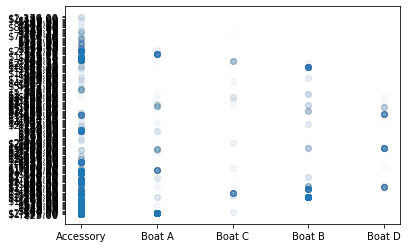

In [4]:
plt.scatter(df['Product'], df['Product Revenue'], alpha =.01);

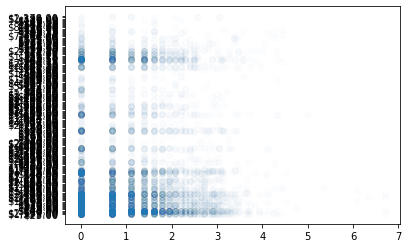

In [16]:
import numpy as np
plt.scatter(np.log(df['Count of Sessions']), df['Product Revenue'], alpha =.01);

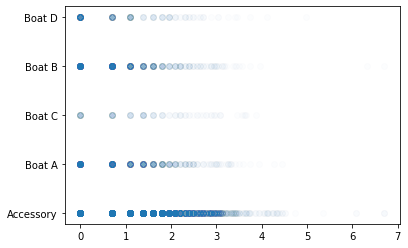

In [17]:
plt.scatter(np.log(df['Count of Sessions']), df['Product'], alpha =.01);

In [5]:
test_frame = df[df['Product']=='Boat A']

test_frame['Product Revenue'].value_counts()

#### There are a few weird outliers, and quite a few where the person bought two boats. I need to find a way to split this into 2 seperate transactions.

$1,599.00    287
$1,359.15     97
$1,399.00     68
$3,198.00     39
$1,360.00     31
$1,190.00     13
$1,299.00     11
$1,279.20      9
$20.00         9
$2,798.00      8
$2,718.30      6
$2,720.00      4
$1,100.00      3
$4,797.00      3
$70.00         3
$40.00         2
$2,598.00      2
$60.00         2
$265.00        1
$650.00        1
$80.00         1
$2,380.00      1
$2,558.40      1
Name: Product Revenue, dtype: int64

In [6]:
test_frame = df[df['Product']=='Accessory']

test_frame['Product Revenue'].value_counts(ascending=False) > 1000

$99.00        True
$199.00      False
$25.00       False
$70.00       False
$30.00       False
             ...  
$105.00      False
$2,599.00    False
$374.00      False
$45.00       False
$280.00      False
Name: Product Revenue, Length: 126, dtype: bool

In [ ]:

### TODO

### Need to turn dates into datetime objects
## Need to turn prices into numbers not strings

## Double check my wrangling and cleaning functions to make sure that the buckets are accurate (consistent with the new metrics I just imported this evening)

### Could get twice as much data if I could figure out what's up with the 'Product Revenue' metric on Google Analytics

### Add in more features by exporting more csv's from Google Analytics

In [8]:
#type(test_frame['Product Revenue'][0])

#test_frame['Product Revenue'].strip('$')

#test_frame